In [6]:
import pandas as pd

data = pd.read_excel("/content/Superstore Dataset.xlsx")
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32479,32480,CA-2018-103772,2018-06-28,2018-07-02,Standard Class,MP-17470,Mark Packer,Home Office,United States,Smyrna,...,30080,South,OFF-BI-10002867,Office Supplies,Binders,GBC Recycled Regency Composition Covers,119.560,2,0.0,54.9976
32480,32481,CA-2018-103772,2018-06-28,2018-07-02,Standard Class,MP-17470,Mark Packer,Home Office,United States,Smyrna,...,30080,South,OFF-AR-10000538,Office Supplies,Art,"Boston Model 1800 Electric Pencil Sharpener, Gray",140.750,5,0.0,42.2250
32481,32482,US-2018-151435,2018-09-06,2018-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.980,1,0.0,22.3548
32482,32483,CA-2018-100251,2018-05-17,2018-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200


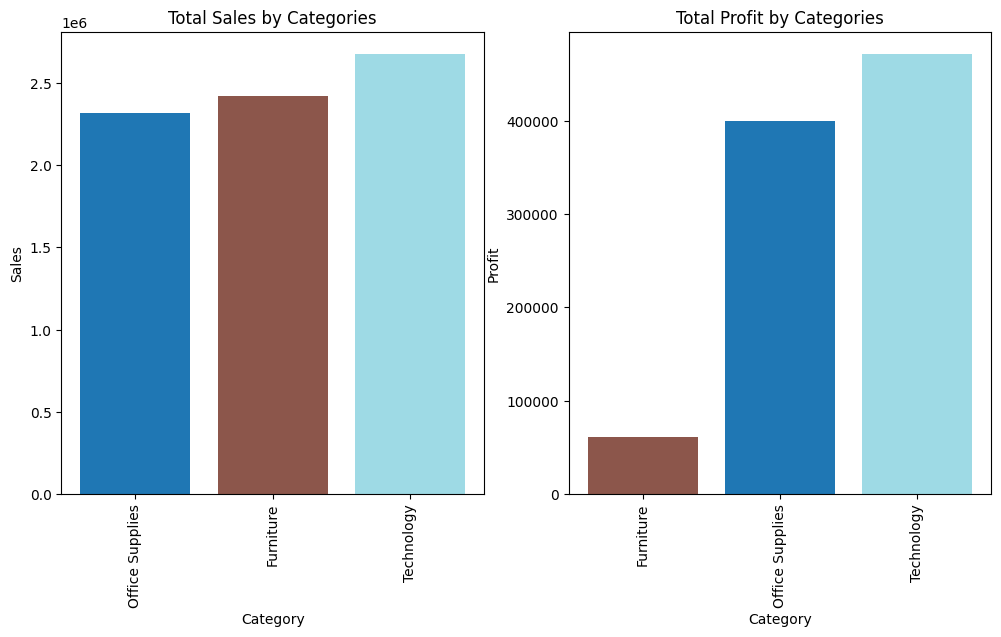

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap


grouped_data_sales = data.groupby('Category')['Sales'].sum().reset_index().sort_values(by='Sales')
grouped_data_profit = data.groupby('Category')['Profit'].sum().reset_index().sort_values(by='Profit')

cmap = plt.get_cmap('tab20', grouped_data_sales.shape[0]) #use tab20 colourmap with number of colours that match the number of sub-categories
color_mapping = {category: cmap(i) for i, category in enumerate(grouped_data_sales['Category'])} ##enumerate - make sure every category gets an unique colour


grouped_data_sales['Color'] = grouped_data_sales['Category'].map(color_mapping) #for each category, map a colour to it
grouped_data_profit['Color'] = grouped_data_profit['Category'].map(color_mapping)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=False) #subplots to compare sales and profit

axes[0].bar(grouped_data_sales['Category'], grouped_data_sales['Sales'], color = grouped_data_sales['Color'])
axes[0].set_title('Total Sales by Categories')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Sales')
axes[0].tick_params(axis='x', rotation=90) #make x-axis vertical for more space

axes[1].bar(grouped_data_profit['Category'], grouped_data_profit['Profit'], color = grouped_data_profit['Color'])
axes[1].set_title('Total Profit by Categories')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Profit')
axes[1].tick_params(axis='x', rotation=90)

plt.show()

We can see that Technology products have the highest sales and profits. Furniture products on the other hand, had large sales but the lowest profit among the three categories.

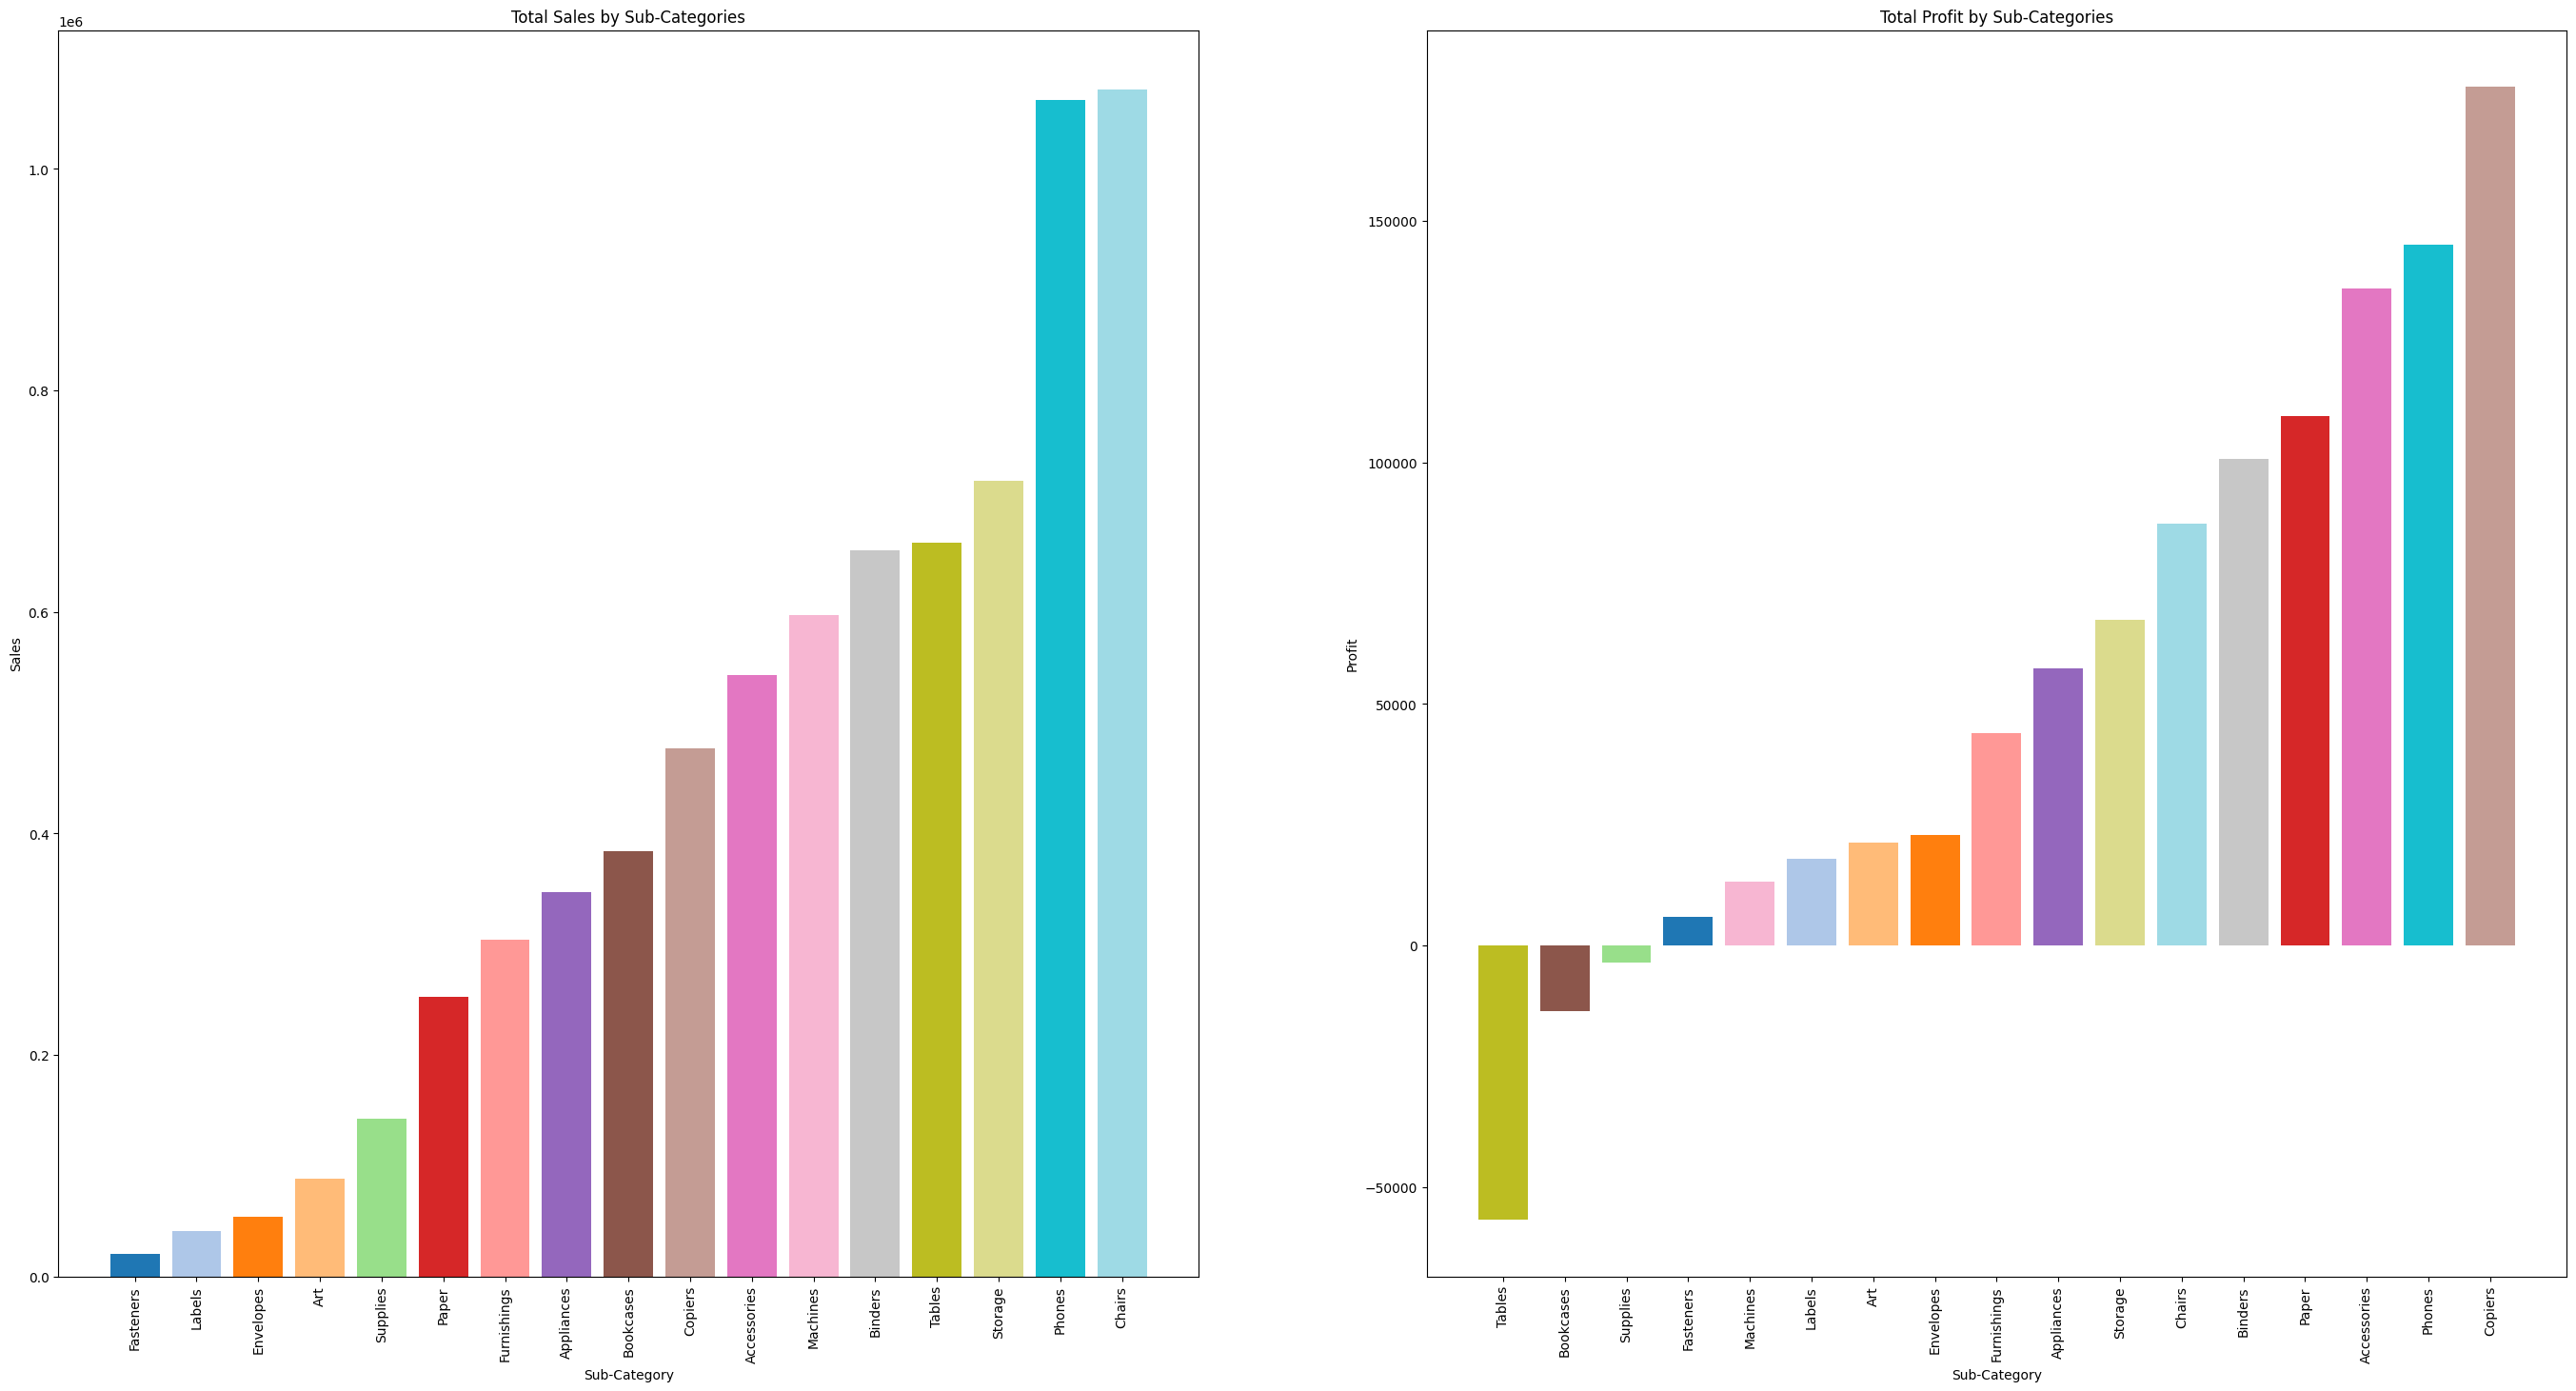

In [81]:
from matplotlib.colors import ListedColormap

grouped_data_sales_sub = data.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales')
grouped_data_profit_sub = data.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit')

cmap = plt.get_cmap('tab20', grouped_data_sales_sub.shape[0])

color_mapping = {category: cmap(i) for i, category in enumerate(grouped_data_sales_sub['Sub-Category'])}


grouped_data_sales_sub['Color'] = grouped_data_sales_sub['Sub-Category'].map(color_mapping)
grouped_data_profit_sub['Color'] = grouped_data_profit_sub['Sub-Category'].map(color_mapping)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(34, 17), sharey=False)

axes[0].bar(grouped_data_sales_sub['Sub-Category'], grouped_data_sales_sub['Sales'], color=grouped_data_sales_sub['Color'])
axes[0].set_title('Total Sales by Sub-Categories')
axes[0].set_xlabel('Sub-Category')
axes[0].set_ylabel('Sales')
axes[0].tick_params(axis='x', rotation=90)

axes[1].bar(grouped_data_profit_sub['Sub-Category'], grouped_data_profit_sub['Profit'], color=grouped_data_profit_sub['Color'])
axes[1].set_title('Total Profit by Sub-Categories')
axes[1].set_xlabel('Sub-Category')
axes[1].set_ylabel('Profit')
axes[1].tick_params(axis='x', rotation=90)


From the bar graphs above, we can see that chairs contribute to sales the most, but lies around the middle for profit. Whereas sales of copiers contribute most to the profit, even though it did not impact the sales significantly.
